In [1]:
import pandas as pd
import vega_datasets
import ipywidgets as widgets
from ipywidgets import interactive, fixed
from av_price_country import plot_av_price_country
from price_point_correlation import plot_price_point_correlation
from taster_specialization import plot_taster_spec
from word_appearance import to_list, plot_word_freqs

In [2]:
df = pd.read_csv("data/winemag_data_130k_v2.csv")

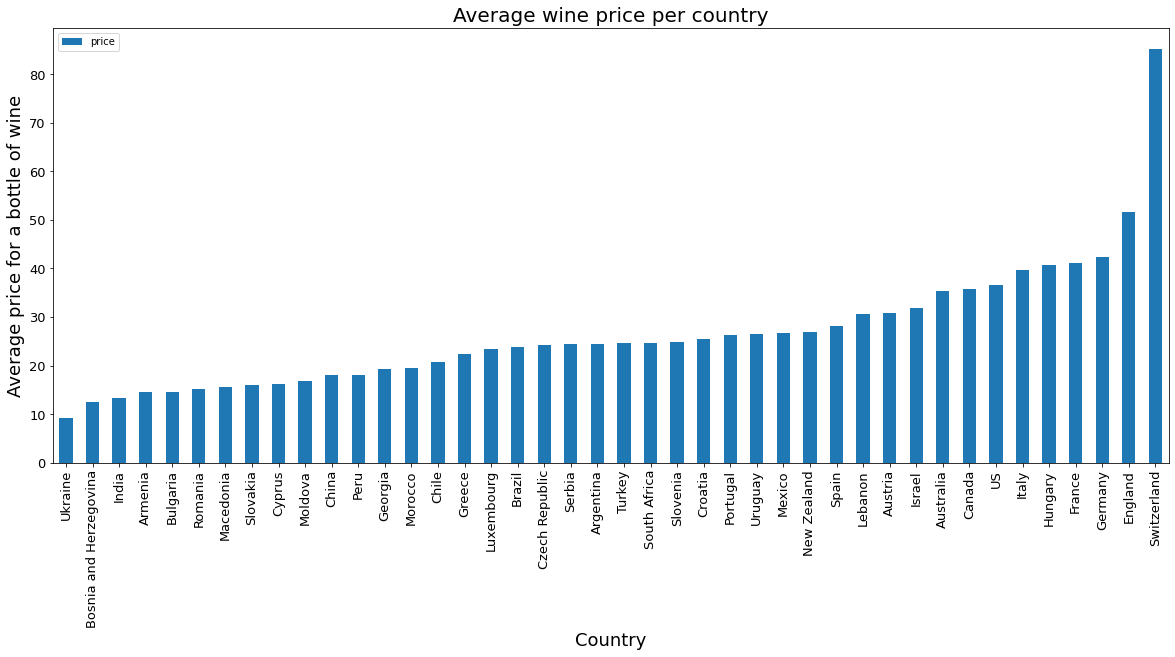

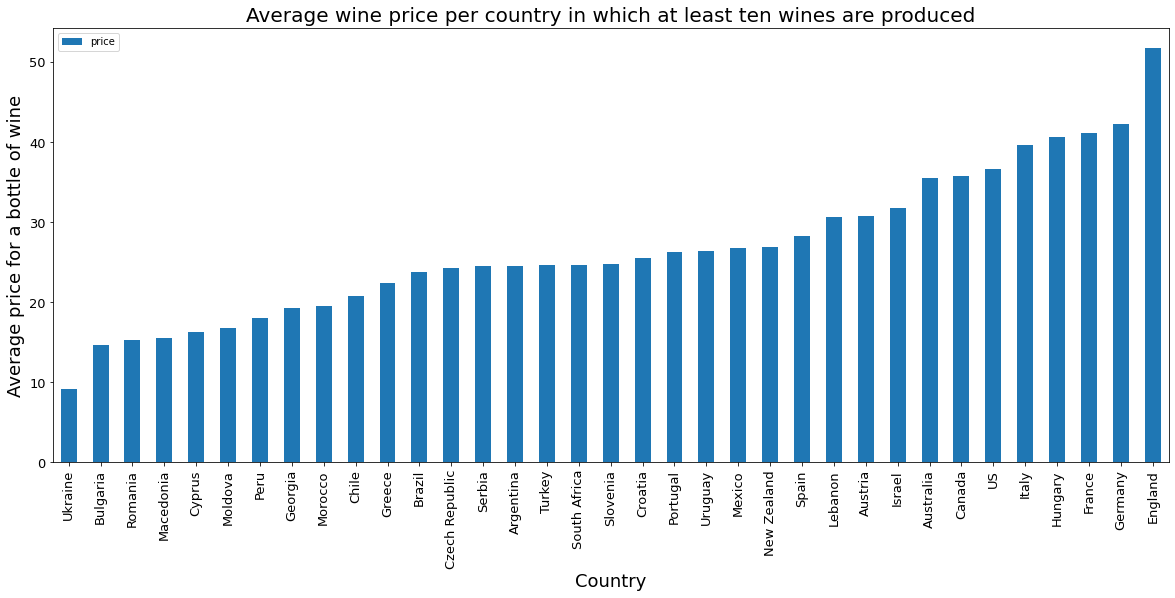

In [3]:
plot_av_price_country(df)

The average price per country is between ~ 9 and ~ 85 Dollars when all countries are considered. If only the countries where more than 10 wines are produced are considered, the maximum average price is slightly higher than 50 Dollars.

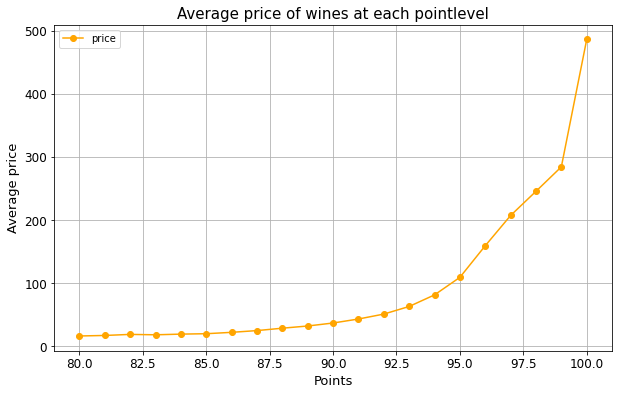

Correlation coefficient = 0.41617018199445666


In [4]:
plot_price_point_correlation(df)

In the plot, we can see that the average price and the number of points are positively correlated. The higher the number of points, the higher the average price. Since there is no linear dependency, but an exponential one, the correlation coefficient of ~0.416 is relatively low. 

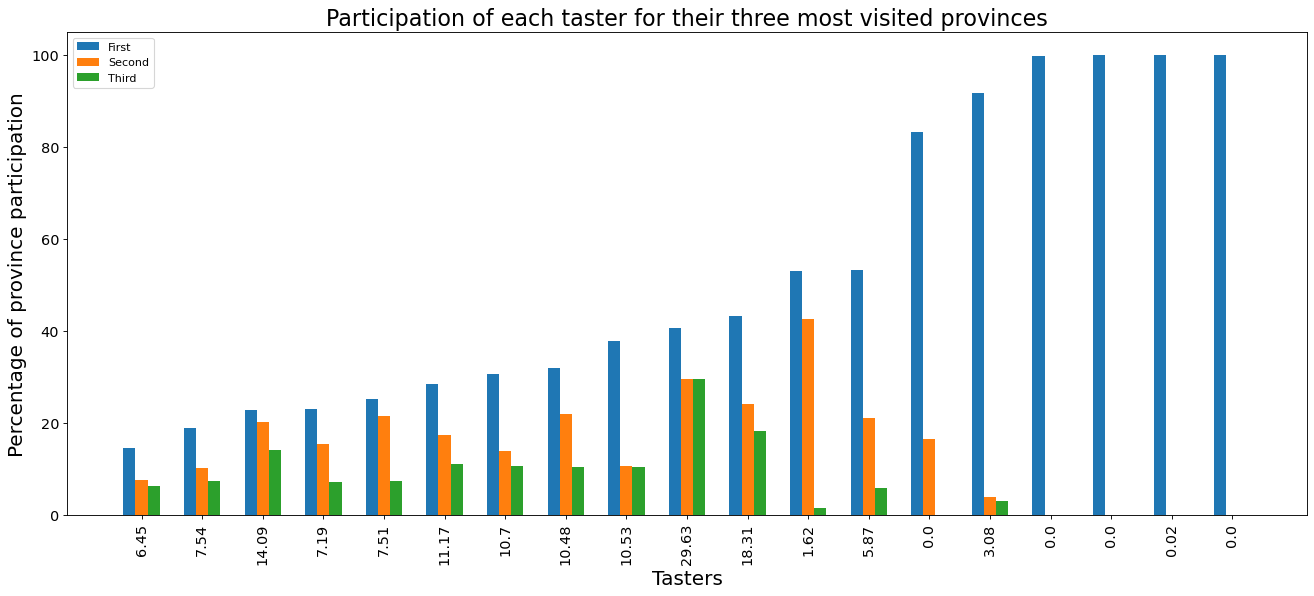

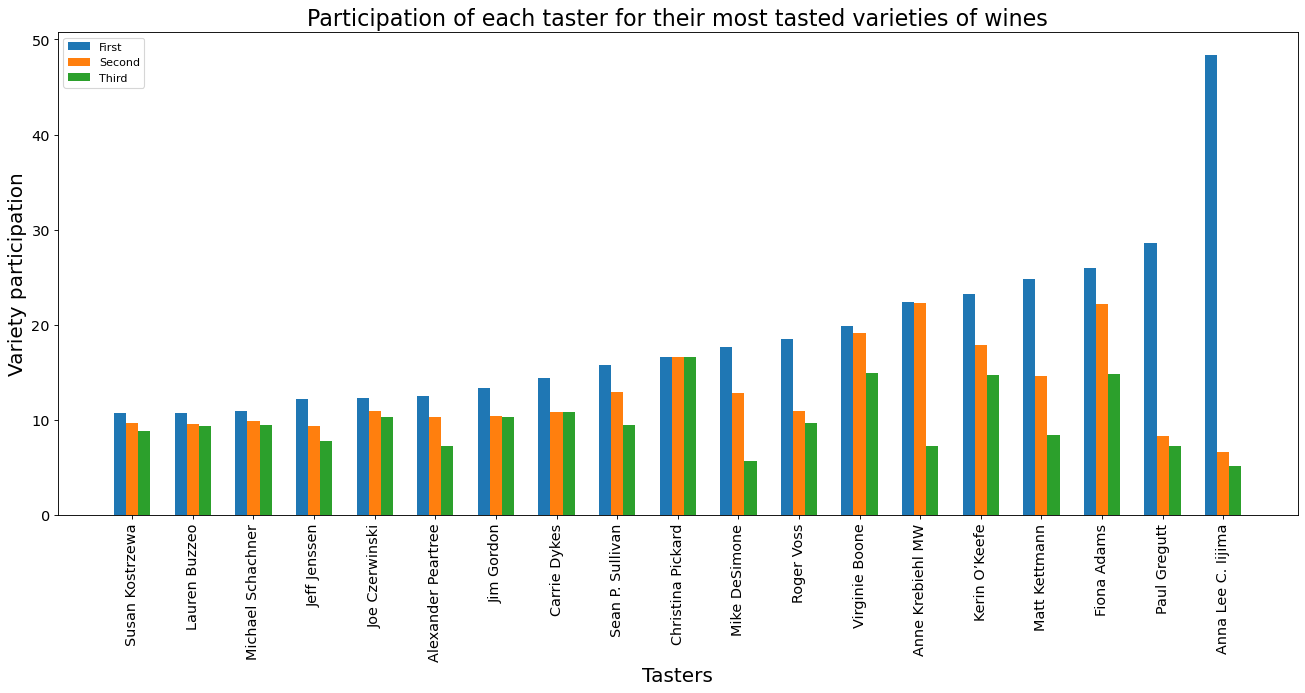

In [5]:
plot_taster_spec(df)

In the first plot, you can see the level of specialization in a province of a taster. The blue bars indicate the percentage of tastings in the province where the taster has made the most tastings. The orange bars indicate the percentage of tastings in the second most visited province and the green bars indicate the percentage of tastings in the third most visited province. The higher the blue bar of a taster is, the more specialized he is in a certain province. If the orange bar is also high (see e.g. Paul Gregutt) this shows a strong specialization in two different provinces and so on.

Analogous to the first plot, the second figure shows how specialized a taster is in a certain variety. Compared to the figure above, the specialization in certain varieties is not as strong for most people (note that the Y scale here only goes up to 50%). In addition, it is noticeable that the three bars of a taster here usually do not differ as much as in the first figure.

In [6]:
df_short = df[["country", "price","variety","points","province"]]
df_short = df_short.dropna()

countries = to_list(df_short, "country", 10)
varieties = to_list(df_short, "variety", 1000)

With the following plots we can compare which characteristic words (flavours) are used to describe the wines in different countries / varieties / point ranges.

In [7]:
# using 'interactive' to make the plot modifiable in real time

interactive(plot_word_freqs,
            df=fixed(df),
            category=fixed("country"),
            choice=widgets.Dropdown(options=countries, description='Country:', disabled=False))

interactive(children=(Dropdown(description='Country:', options=('Argentina', 'Australia', 'Austria', 'Brazil',…

In [8]:
interactive(plot_word_freqs,
            df=fixed(df),
            category=fixed("variety"),
            choice=widgets.Dropdown(options=varieties, description='Variety:', disabled=False))

interactive(children=(Dropdown(description='Variety:', options=('Bordeaux-style Red Blend', 'Cabernet Franc', …

In [9]:
interactive(plot_word_freqs,
            df=fixed(df),
            category=fixed("points"),
            choice=widgets.FloatRangeSlider(min=df["points"].min(), max=df["points"].max()))

interactive(children=(FloatRangeSlider(value=(85.0, 95.0), description='choice', min=80.0), Output()), _dom_cl…